In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('hospital distance.xlsx')
data.head()

,Dzongkhag_Name,Gewog,Hospital1_per(KM),Hospital2_per(KM),Hospital3_per(KM),Hospital4_per(KM),Female,Male,Total,Unnamed: 9,Unnamed: 10
0,Bumthang,CHHOEKHOR,5.2,0.0,0.0,0.0,1905,2042,3947,NaN,NaN
1,Bumthang,TANG,16.8,0.0,0.0,0.0,1153,1165,2318,NaN,NaN
2,Bumthang,CHHUMIG,21.8,0.0,0.0,0.0,1447,1748,3195,NaN,NaN
3,Bumthang,URA,44.6,0.0,0.0,0.0,853,871,1724,NaN,NaN
4,Bumthang,BHUMTHANG TOWN,1.2,0.0,0.0,0.0,2862,3381,6243,NaN,NaN


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

data = pd.read_excel('hospital distance.xlsx')

# Create subplots for each dzongkhag
unique_dzongkhags = data['Dzongkhag_Name'].unique()

# Function to update the plot based on selected dzongkhag
def update_plot(selected_dzongkhag):
    dzongkhag_data = data[data['Dzongkhag_Name'] == selected_dzongkhag]

    # Set up subplots
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    fig.suptitle(f'Distance between Gewogs and Hospitals in {selected_dzongkhag}')

    bar_width = 0.2  # Width of each bar
    bar_positions = range(len(dzongkhag_data))

    # Calculate x-coordinates for bars
    x_positions_hospital1 = [pos - bar_width for pos in range(len(dzongkhag_data))]
    x_positions_hospital2 = [pos for pos in range(len(dzongkhag_data))]
    x_positions_hospital3 = [pos + bar_width for pos in range(len(dzongkhag_data))]

    # Plot distances for each hospital
    axs.bar(x_positions_hospital1, dzongkhag_data['Hospital1_per(KM)'], width=bar_width, label='Hospital 1')
    axs.bar(x_positions_hospital2, dzongkhag_data['Hospital2_per(KM)'], width=bar_width, label='Hospital 2')
    axs.bar(x_positions_hospital3, dzongkhag_data['Hospital3_per(KM)'], width=bar_width, label='Hospital 3')

    axs.set_title(selected_dzongkhag)
    axs.set_xlabel('Gewog')
    axs.set_ylabel('Distance')
    axs.set_xticks(range(len(dzongkhag_data)))
    axs.set_xticklabels(dzongkhag_data['Gewog'], rotation=45)  # Rotate x-axis labels
    axs.legend()

    # Show the plot
    plt.show()

# Create a dropdown widget
dzongkhag_dropdown = Dropdown(options=unique_dzongkhags, description='Dzongkhag:')

# Connect the dropdown to the update function
interact(update_plot, selected_dzongkhag=dzongkhag_dropdown)


interactive(children=(Dropdown(description='Dzongkhag:', options=('Bumthang', 'Chhukha', 'DAGANA', 'Gasa', 'Ha…

<function __main__.update_plot(selected_dzongkhag)>

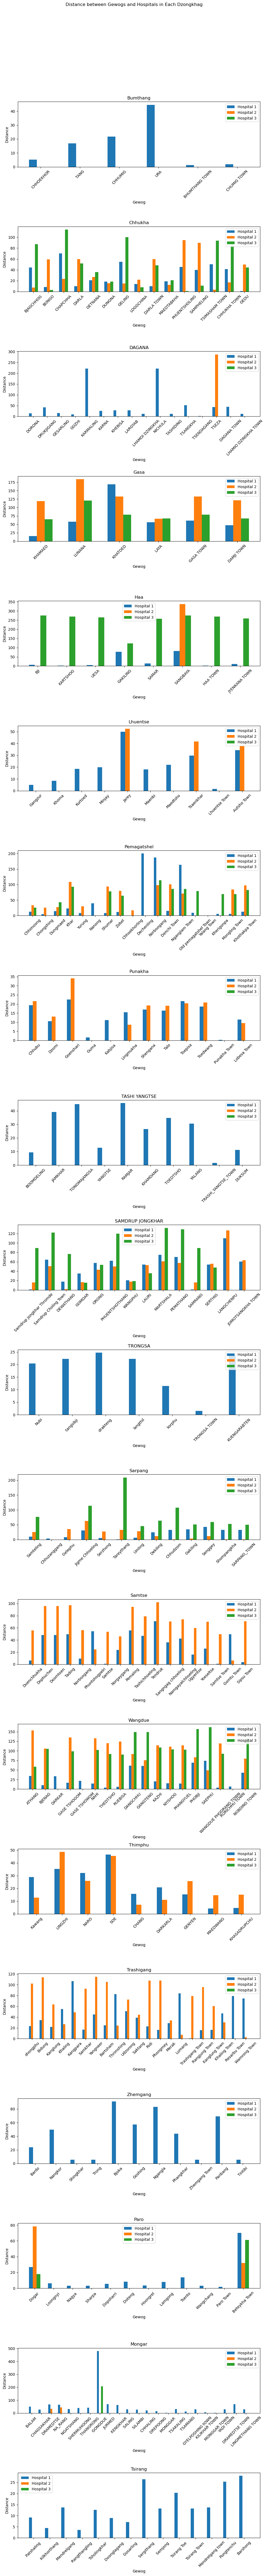

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('hospital distance.xlsx')

# Create subplots for each dzongkhag
unique_dzongkhags = data['Dzongkhag_Name'].unique()

# Set up subplots
fig, axs = plt.subplots(nrows=len(unique_dzongkhags), ncols=1, figsize=(10, 5 * len(unique_dzongkhags)))
fig.suptitle('Distance between Gewogs and Hospitals in Each Dzongkhag')

bar_width = 0.2  # Width of each bar
bar_positions = range(len(unique_dzongkhags))

for i, dzongkhag in enumerate(unique_dzongkhags):
    dzongkhag_data = data[data['Dzongkhag_Name'] == dzongkhag]
    
    # Calculate x-coordinates for bars
    x_positions_hospital1 = [pos - bar_width for pos in range(len(dzongkhag_data))]
    x_positions_hospital2 = [pos for pos in range(len(dzongkhag_data))]
    x_positions_hospital3 = [pos + bar_width for pos in range(len(dzongkhag_data))]
    
    # Plot distances for each hospital
    axs[i].bar(x_positions_hospital1, dzongkhag_data['Hospital1_per(KM)'], width=bar_width, label='Hospital 1')
    axs[i].bar(x_positions_hospital2, dzongkhag_data['Hospital2_per(KM)'], width=bar_width, label='Hospital 2')
    axs[i].bar(x_positions_hospital3, dzongkhag_data['Hospital3_per(KM)'], width=bar_width, label='Hospital 3')
    
    axs[i].set_title(dzongkhag)
    axs[i].set_xlabel('Gewog')
    axs[i].set_ylabel('Distance')
    axs[i].set_xticks(range(len(dzongkhag_data)))
    axs[i].set_xticklabels(dzongkhag_data['Gewog'], rotation=45)  # Rotate x-axis labels
    axs[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [20]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Dropdown

data = pd.read_excel('hospital distance.xlsx')

# Create subplots for each dzongkhag
unique_dzongkhags = data['Dzongkhag_Name'].unique()

# Function to update the plot based on selected dzongkhag
def update_plot(selected_dzongkhag):
    dzongkhag_data = data[data['Dzongkhag_Name'] == selected_dzongkhag]

    # Set up figure
    fig = px.bar(
        dzongkhag_data,
        x='Gewog',
        y=['Hospital1_per(KM)', 'Hospital2_per(KM)', 'Hospital3_per(KM)'],
        labels={'value': 'Distance', 'variable': 'Hospital'},
        title=f'Distance between Gewogs and Hospitals in {selected_dzongkhag}',
        barmode='group'  # Display bars side by side
    )

    # Show the plot
    fig.show()

# Create a dropdown widget
dzongkhag_dropdown = Dropdown(options=unique_dzongkhags, description='Dzongkhag:')

# Connect the dropdown to the update function
interact(update_plot, selected_dzongkhag=dzongkhag_dropdown)


interactive(children=(Dropdown(description='Dzongkhag:', options=('Bumthang', 'Chhukha', 'DAGANA', 'Gasa', 'Ha…

<function __main__.update_plot(selected_dzongkhag)>